## Statistics and Data Analysis, Homework 3
# Differential Gene Expression in Acute Myocardial Infraction
Gabriel Mazor, Yam Libman

## The Data Set
1. Dataset record in NCBI:
   https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE66360
2. Published Paper: Muse et al, Sci Rep 2017
   https://www.nature.com/articles/s41598-017-12166-0

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, ranksums, mannwhitneyu, ttest_ind
import scipy.stats as stats
import statsmodels as statsmodels
from statsmodels.stats.multitest import multipletests, fdrcorrection

### Pre-processing the dataset

In [3]:
# loading the dataset

path = "AMI_GSE66360_series_matrix.csv"
data = pd.read_csv(path, encoding='ISO-8859-1', header=None)
pd.set_option('display.max_rows', 100)
data.head(70)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"!Series_title\t""A Whole Blood Molecular Signat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"!Series_geo_accession\t""GSE66360""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"!Series_status\t""Public on Feb 28 2015""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"!Series_submission_date\t""Feb 27 2015""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"!Series_last_update_date\t""Dec 27 2017""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"!Series_summary\t""Despite the significant redu...",CVD still accounts for a third of all deaths ...,dyslipidemia,diabetes mellitus,cigarette smoking,inactivity) remain the focus of primary preve...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"!Series_summary\t""We isolated circulating endo...",and measured gene expression using the HG-133...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"!Series_overall_design\t""Circulating endotheli...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"!Series_type\t""Expression profiling by array""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"!Series_contributor\t""Eric",R,"Kramer""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# removing irrelevant metadata rows

prep_df = data.iloc[59:,:]

In [5]:
prep_df.shape

(54677, 100)

In [6]:
# transoposing the dataset to get patients as rows

prep_df = prep_df.transpose()

In [7]:
prep_df.head(15)

,59,60,61,62,63,64,65,66,67,68,...,54726,54727,54728,54729,54730,54731,54732,54733,54734,54735
0,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
6,H,GSM1620824,5.116153518,7.203591859,6.43522914,6.28542026,2.70668403,9.538661422,7.43717345,5.408639388,...,13.27999,13.318979,14.559615,14.271351,4.731282,3.043079,2.817982,2.52161,3.51609,3.774956
7,H,GSM1620825,5.431328058,7.694550756,6.320546126,6.562315839,2.674746672,9.837551637,7.127690377,5.111689416,...,13.374495,13.472778,14.520451,14.250759,4.531371,3.231108,2.52506,2.840601,3.514949,3.526497
8,H,GSM1620826,5.235270857,7.760259212,6.48359047,6.345887555,2.635149735,10.11188891,8.214922404,5.61726259,...,13.428778,13.425372,14.579482,14.325664,4.318541,3.304716,2.917278,2.509774,3.475952,3.626839
9,H,GSM1620827,5.773528455,8.279814404,6.387779205,6.27280582,2.696649177,9.629918501,7.415155953,5.317689635,...,13.290415,13.346196,14.596206,14.289393,4.43224,3.384011,2.643849,2.69682,3.495199,3.599542


In [8]:
# finalizing pre-processing

df = prep_df.iloc[1:,:]
df.columns = prep_df.iloc[0]
df.reset_index(drop=True)

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
1,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
2,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
3,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
4,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
5,H,GSM1620824,5.116153518,7.203591859,6.43522914,6.28542026,2.70668403,9.538661422,7.43717345,5.408639388,...,13.27999,13.318979,14.559615,14.271351,4.731282,3.043079,2.817982,2.52161,3.51609,3.774956
6,H,GSM1620825,5.431328058,7.694550756,6.320546126,6.562315839,2.674746672,9.837551637,7.127690377,5.111689416,...,13.374495,13.472778,14.520451,14.250759,4.531371,3.231108,2.52506,2.840601,3.514949,3.526497
7,H,GSM1620826,5.235270857,7.760259212,6.48359047,6.345887555,2.635149735,10.11188891,8.214922404,5.61726259,...,13.428778,13.425372,14.579482,14.325664,4.318541,3.304716,2.917278,2.509774,3.475952,3.626839
8,H,GSM1620827,5.773528455,8.279814404,6.387779205,6.27280582,2.696649177,9.629918501,7.415155953,5.317689635,...,13.290415,13.346196,14.596206,14.289393,4.43224,3.384011,2.643849,2.69682,3.495199,3.599542
9,H,GSM1620828,6.016415473,7.580840863,6.307065808,5.971847425,2.802862883,9.163517217,6.822991034,5.527330066,...,13.278438,13.263749,14.557877,14.241072,4.782958,3.139504,2.787684,2.79354,3.580411,3.67438


In [9]:
df.dtypes

0
Class              object
ID_REF             object
1007_s_at          object
1053_at            object
117_at             object
                    ...  
AFFX-ThrX-5_at     object
AFFX-ThrX-M_at     object
AFFX-TrpnX-3_at    object
AFFX-TrpnX-5_at    object
AFFX-TrpnX-M_at    object
Length: 54677, dtype: object

In [10]:
df = pd.concat([df.iloc[:, :2], df.iloc[:, 2:].astype(float)], axis=1)
df.dtypes

0
Class               object
ID_REF              object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object

# Analysis

#### a. High level description of the data and some pre-processing

1. How many genes profiled?

In [11]:
print(f"There are {df.shape[1]-2} genes profiled")

There are 54675 genes profiled


2. How many samples (subjects/patients) in total?

In [12]:
print(f"There are {df.shape[0]} samples")

There are 99 samples


3. How many samples in each class?

In [13]:
H = df[df['Class']=='H']['ID_REF'].nunique()
M = df[df['Class']=='M']['ID_REF'].nunique()

print(f'There are {H} samples calssed as H')
print(f'There are {M} samples classed as M')

There are 50 samples calssed as H
There are 49 samples classed as M


4. If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [14]:
nullColumns = df.isnull().sum(axis=0)
columns_with_null = nullColumns[nullColumns > 0].index
df = df.drop(columns_with_null, axis=1)
print(f'We have {df.shape[1]-2} genes after removing {nullColumns.sum(axis=0)} columns with null values ({df.shape[1]} features including genes, Class and ID_REF)')

We have 54628 genes after removing 47 columns with null values (54630 features including genes, Class and ID_REF)


5. Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

/var/folders/0q/fy5tvxp924g_s_0ypkx1v_5w0000gn/T/ipykernel_66426/1408100889.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  qa5dfnnull = qa5df.fillna(qa5df.mean())


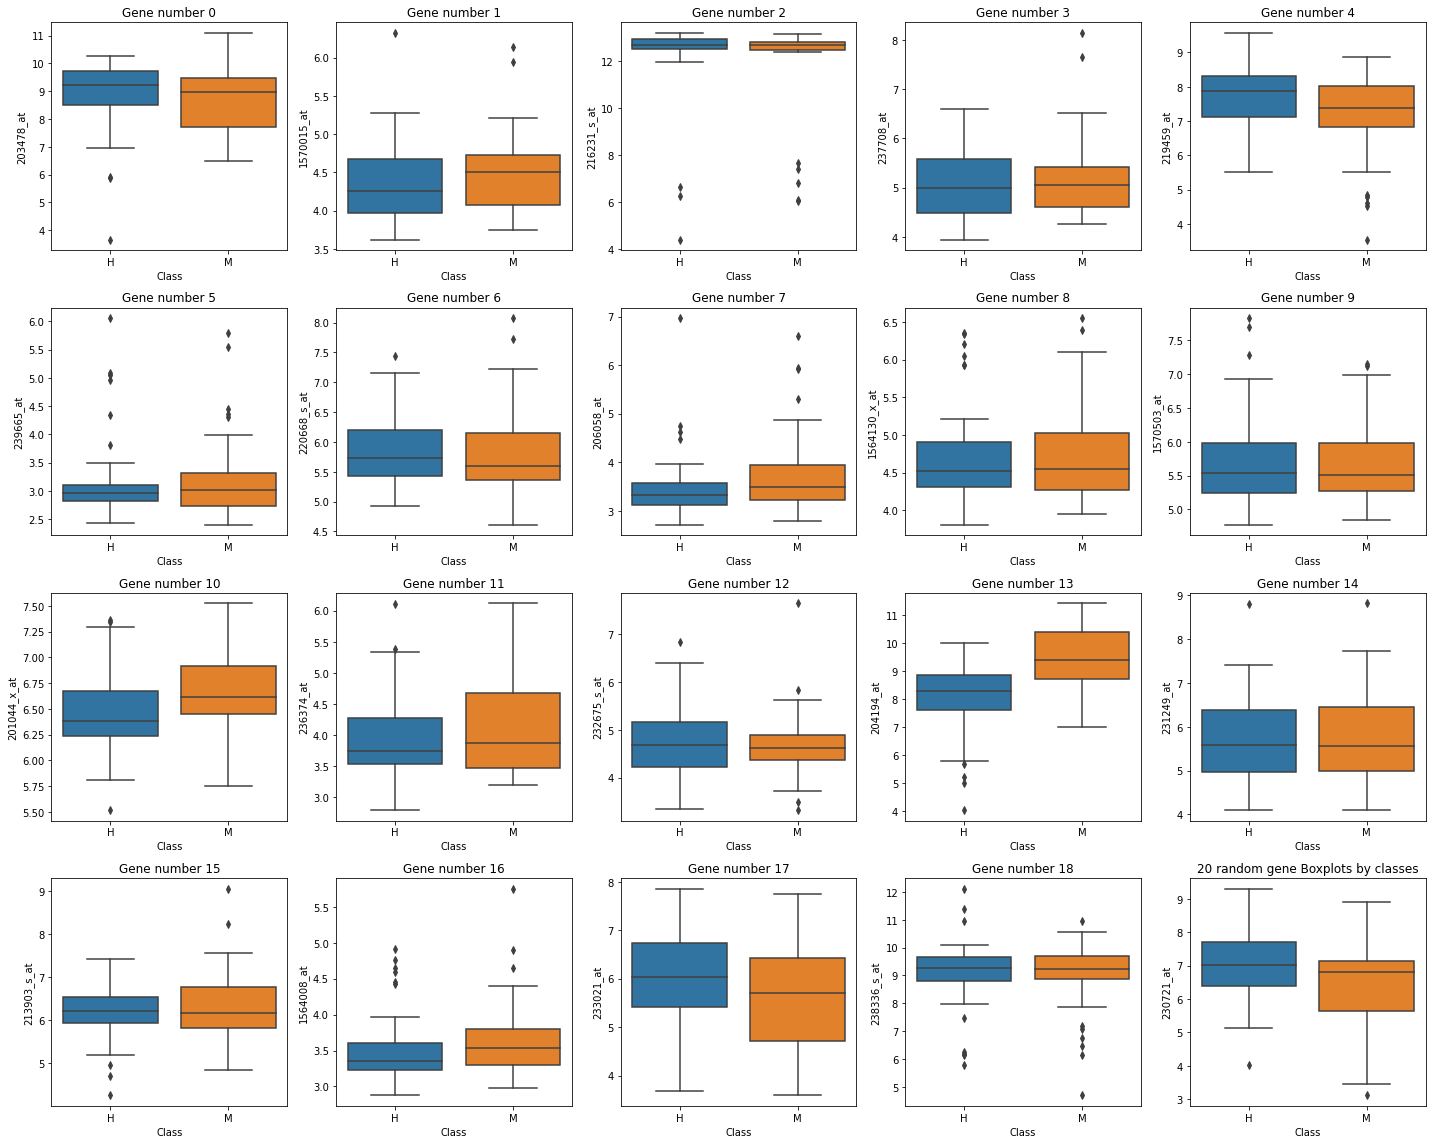

In [15]:
df_cols = df.columns[2:]
rand_genes = np.random.choice(df_cols, size=20, replace=False)
rand_genes_class_incld = np.append(rand_genes, 'Class')

qa5df = df.loc[:,rand_genes_class_incld]

qa5dfpb_class = qa5df.iloc[:,-1]
qa5dfpb = qa5df.iloc[:,:-1].astype(float)
qa5dfpb = pd.concat([qa5dfpb, qa5dfpb_class], axis=1)

qa5dfnnull = qa5df.fillna(qa5df.mean())
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
for i, col in enumerate(qa5df.columns[:-1]):
    ax = axes[i // 5, i % 5]
    sns.boxplot(x='Class', y=col, data=qa5dfpb, ax=ax)
    ax.set_title(f'Gene number {i}')

plt.tight_layout()
plt.title('20 random gene Boxplots by classes')
plt.show()

#### b. WRS for differential expression (DE)

1. Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

In [16]:
ExSumRanks = M*(H+M+1)/2

print(f'The expected sum of ranks of g`s expression level measured for samples labled M is: {ExSumRanks}')

The expected sum of ranks of g`s expression level measured for samples labled M is: 2450.0


2. Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

The maximum sum of ranks for M , would occur if they are assigned the highest possible ranks, which are 51 through 99

In [17]:
print(f'the maximal value that RS(g) can take is: {sum(range(51,100))}')

the maximal value that RS(g) can take is: 3675


3. Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

To get RS(g) = c we need to have all M samples to be in the end. <br>
There are 99! permutations for sorting all samples, and 49! for sorting the M samples between themselves. <br>
Therefore, this probability is <br><br>
$P(RS(g)=c)= \frac{50!}{99!} \approx 0$

4. Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (Provide formulas and explain them)

The formula works here the same, however using combinatorics here isn't straightforward.<br><br>
The probability of RS(g) = c-1, can also be calculated using the cumulative distribution function (CDF) of the Wilcoxon rank-sum distribution:

$P(RS(g) = c-1) ≈ Φ((c-1 - μ) / σ) - Φ((c-2 - μ) / σ)$

The probability of RS(g) = c-2, denoted as P(RS(g) = c-2), can be calculated similarly:

$P(RS(g) = c-2) ≈ Φ((c-2 - μ) / σ) - Φ((c-3 - μ) / σ)$

where Φ is the standard normal CDF, μ and σ are the mean and standard deviation of the Wilcoxon rank-sum distribution, respectively, and c is the maximal possible sum of ranks for the given sample sizes.

In [18]:
c = sum(range(51,100))
mu = c / 2
sigma = np.sqrt(M * H * (H + M + 1) / 12)

p = norm.cdf((c - mu) / sigma) - norm.cdf((c - 1 - mu) / sigma)
print("Probability of RS(g) = c-1:", p)
p = norm.cdf((c - mu) / sigma) - norm.cdf((c - 2 - mu) / sigma)
print("Probability of RS(g) = c-2:", p)

Probability of RS(g) = c-1: 0.0
Probability of RS(g) = c-2: 0.0


5. Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [19]:
def RS_func(col):
  ranks = col.rank()
  return ranks

In [20]:
RS_g_dist = df.iloc[:,2:].apply(RS_func)
RS_g_dist['ID_REF'] = df.iloc[:,1].tolist()
RS_g_dist['Class'] = df.iloc[:,0].tolist()

RS_g_dist_m = RS_g_dist[RS_g_dist['Class']=='M'].iloc[:,:-2]
rsg_values = RS_g_dist_m.sum(axis=0)

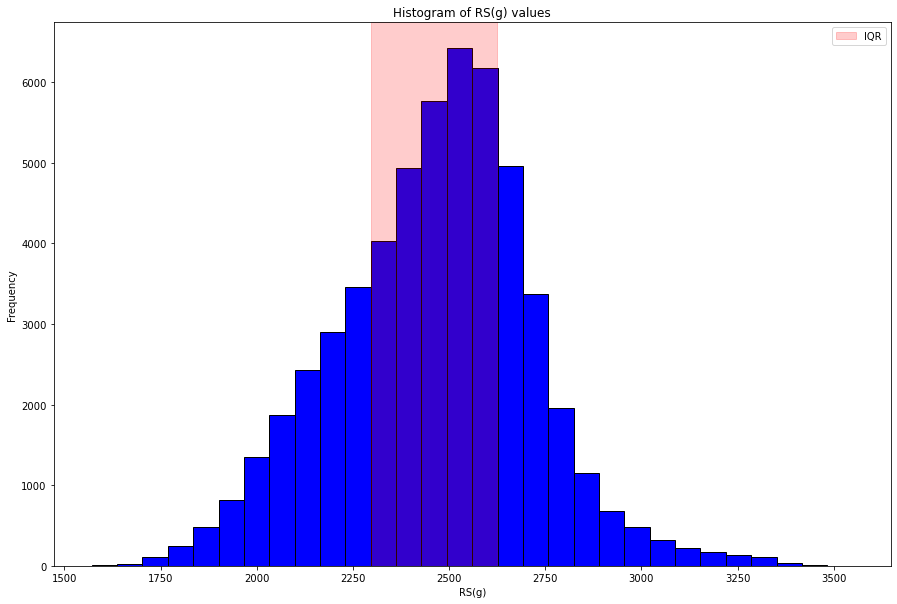

In [21]:
plt.figure(figsize = (15,10))
plt.hist(rsg_values, bins=30, color='blue', edgecolor='black')
plt.xlabel('RS(g)')
plt.ylabel('Frequency')
plt.title('Histogram of RS(g) values')

# compute the IQR and add it to the plot
q1, q3 = np.percentile(rsg_values, [25, 75])
iqr = q3 - q1
plt.axvspan(q1, q3, alpha=0.2, color='red', label='IQR')
plt.legend()

plt.show()

#### c. Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07.
For both directions use both a Student t-test and a WRS test.

In [22]:
df_m = df[df['Class']=='M'].iloc[:,2:]
df_h = df[df['Class']=='H'].iloc[:,2:]

thresh = 0.07

t_right_pvals = ttest_ind(df_m, df_h, alternative = 'greater')[1]
t_left_pvals = ttest_ind(df_m, df_h, alternative = 'less')[1]

t_over = (t_right_pvals<thresh).sum()
t_under = (t_left_pvals<thresh).sum()

w_right_pvals = mannwhitneyu(df_m, df_h, alternative = 'greater')[1]
w_left_pvals = mannwhitneyu(df_m, df_h, alternative = 'less')[1]

w_over = (w_right_pvals < 0.07).sum()
w_under = (w_left_pvals < 0.07).sum()

print("Student t-test:")
print(f"Overexpressed: {t_over}")
print(f"Underexpressed: {t_under}")
print("\nWilcoxon rank-sum test:")
print(f"Overexpressed: {w_over}")
print(f"Underexpressed: {w_under}")

Student t-test:
Overexpressed: 8517
Underexpressed: 8639

Wilcoxon rank-sum test:
Overexpressed: 10721
Underexpressed: 10618


#### d. Correlations
Select the 80 most significant genes from each one of the onesided
WRS DE lists you computed in 3c. Generate a set of 160
genes, D, which is the union of the above two sets.

In [23]:
w_over_idx = np.argsort(w_right_pvals)[:80]
top_right = df.columns[2:][w_over_idx]
right_df = df[top_right]


w_under_idx = np.argsort(w_left_pvals)[:80]
top_left = df.columns[2:][w_under_idx]
left_df = df[top_left]

In [24]:
d = pd.concat((right_df, left_df), axis=1)
corr = d.corr(method='spearman')

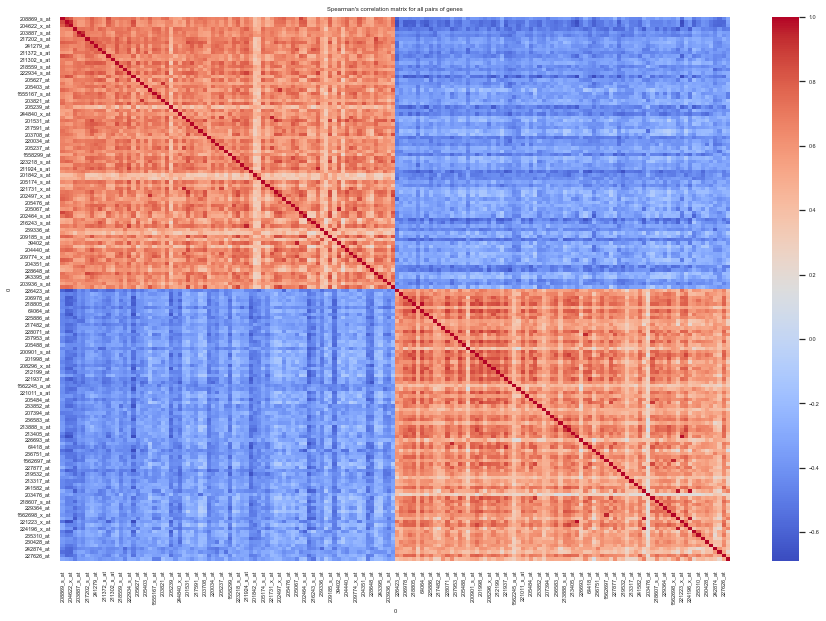

In [25]:
plt.figure(figsize = (15,10))
sns.set(font_scale=0.5)
sns.heatmap(corr, cmap="coolwarm")
plt.title("Spearman's correlation matrix for all pairs of genes")
plt.show()

2. Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜌?

Under a NULL model that assumes genes are pairwise independent, the expected value for 𝜌 is 0. This is because, under this assumption, there is no systematic relationship between the expression levels of any two genes, and therefore their rank correlation coefficient should be close to 0.

3. Now compute the Spearman 𝜌 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed?
Compare it to the value in the above section. Explain.

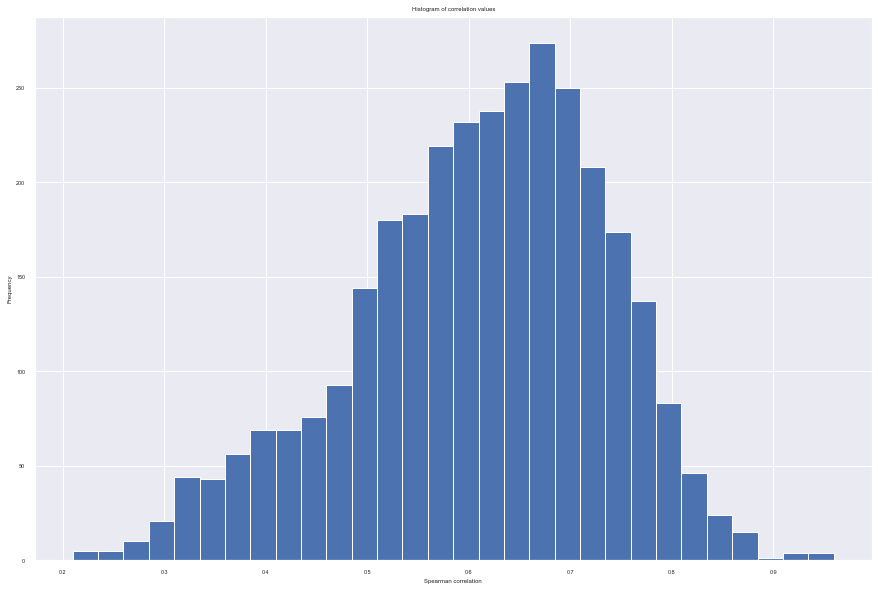

In [26]:
D_genes_set_over = df[top_right]
over_corr = D_genes_set_over.corr(method='spearman')
corr_values = over_corr.where(np.triu(np.ones(over_corr.shape), k=1).astype(bool)).stack()

plt.figure(figsize = (15,10))
plt.hist(corr_values, bins=30)
plt.xlabel('Spearman correlation')
plt.ylabel('Frequency')
plt.title('Histogram of correlation values')
plt.show()

The average value (0.6) could imply that each pair of features tend to be a positive correlation.
It suggests that the overexpressed genes in D have a tendency to be co-expressed.

4. What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression levels of genes, across a set of samples)?

The co-expression relationships among the genes in set D are generally weak to moderate. The distribution of correlation values seems to be centered around zero, which could indicate that there are no strong global co-expression patterns among the genes in set D.

5. What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05?
   Explain your answer.

In [ ]:
# Adjust p-values for multiple testing using Benjamini-Hochberg procedure
rejected, corrected_p_values, _, _ = multipletests(np.tril(over_corr.values).flatten(), alpha=0.05, method='fdr_bh')

# Count the significant co-expressed gene pairs at FDR = 0.05
num_significant_pairs = np.sum(rejected)

print(f'Number of significant co-expressed gene pairs at FDR = 0.05: {num_significant_pairs}')

Our dataset contains 54,628 different features which create about
1 billion of unique pairs.

Given,
FDR threshold = 0.05 for the null hypothesis,
a 5% of these gene pairs could be expected to be identified wrong as significantly co-expressed.
Leads to approximately 74M gene pairs exhibiting a p-value that is erroneously considered significant.

However,
In a specific subsets of overexpressed and underexpressed genes,
A number of gene pairs that exhibit significant co-expression has been observed,
Thus,
its p-values are lower than it could be expected by their ranking within the entire values of p-value comparisons.
Leading us to execute an FDR=0.05 on the dataset,
more significant co-expressed gene pairs should have been expected. Finally,
the number of important co-expression relationships is common to leap the 74M pairs estimated under the null hypothesis.

6. What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?

Advantages:

1. Comprehensive analysis: Analyzing all genes in the study
provides a more comprehensive understanding of the global co-expression patterns and potential gene networks. This can help identify novel interactions and pathways not evident when focusing only on set D.

2. Discovery of new relationships: By analyzing all genes, you may discover new co-expression relationships between genes not present in set D, which could provide additional insights into the molecular mechanisms underlying the condition being studied.

3. Identification of potential confounding factors: Analyzing the co-expression patterns of all genes can help you identify potential confounding factors, such as batch effects or other technical biases, that may affect your results.

4. Construction of gene co-expression networks: Investigating co-expression patterns for all genes allows you to construct gene co-expression networks, which can be useful for identifying gene modules, hub genes, or potential biomarkers related to the condition being studied.

Disadvantages:

1. Increased computational burden: Computing co-expression for all genes in the study requires more computational resources and time, especially for large datasets with thousands of genes.

2. Multiple testing issues: When analyzing all genes, the number of hypothesis tests performed increases dramatically, leading to more stringent multiple testing corrections and a higher likelihood of false negatives (type II errors).

3. Difficulty in interpretation: Analyzing co-expression patterns for all genes can result in complex co-expression networks that may be challenging to interpret and visualize, particularly if many genes exhibit weak or non-specific co-expression relationships.

4. Potentially less focus on relevant genes: By analyzing all genes, you might dilute the focus on the most relevant genes in set D, which were identified as differentially expressed between the conditions being compared. This could make it more challenging to draw meaningful conclusions about the genes of interest.

#### e. Plot and Conclusions of the DE and correlation analysis

1. Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c.  
State, for each comparison, the number of genes, k, at whichwe observe with an FDR threshold of:  
a) 𝜏 = 0.05  
b) 𝜏 = 0.01  
c) 𝜏 = 0.005    
  If these events are not observed at any k>0, then make that statement.

In [28]:
ranks_t = pd.Series(t_right_pvals).rank(method = 'first')
eT = t_right_pvals * len(t_right_pvals)

ranks_w = pd.Series(w_right_pvals).rank(method = 'first')
eW = w_right_pvals * len(w_right_pvals)

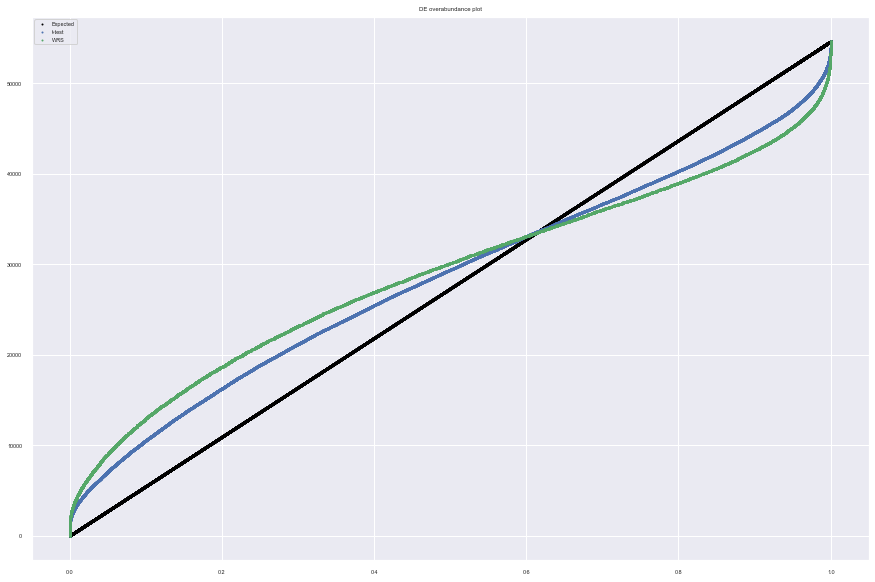

In [29]:
plt.figure(figsize = (15,10))
plt.scatter(t_right_pvals, eT, label = "Expected", c = 'black', s=1)
plt.scatter(t_right_pvals, ranks_t, label = "t-test", c = 'b', s=1)
plt.scatter(w_right_pvals, ranks_w, label = "WRS", c = 'g', s=1)
plt.legend()
plt.title("DE overabundance plot")
plt.show()

In [30]:
def geneForFdr(t,test):
  fdr = (multipletests(test, alpha=0.05, method='fdr_bh')[1]<=t).sum()
  return fdr

fdrs = [0.05, 0.01, 0.005]
print("t-test")

for t in fdrs:
  print(f"number of genes, k, we observed with an FDR threshold of: {t} is {geneForFdr(t,t_right_pvals)}")

print("\nWRS")

for t in fdrs:
  print(f"number of genes, k, we observed with an FDR threshold of: {t} is {geneForFdr(t, w_right_pvals)}")

t-test
number of genes, k, we observed with an FDR threshold of: 0.05 is 2104
number of genes, k, we observed with an FDR threshold of: 0.01 is 1305
number of genes, k, we observed with an FDR threshold of: 0.005 is 1104

WRS
number of genes, k, we observed with an FDR threshold of: 0.05 is 2784
number of genes, k, we observed with an FDR threshold of: 0.01 is 1601
number of genes, k, we observed with an FDR threshold of: 0.005 is 1322


2. For any given gene, g, consider the following set of p-values:
𝑆(𝑔) = -𝑝(𝜆)|
𝑝(𝜆) 𝑖𝑠 𝑎 𝑊𝑅𝑆 𝑝 − 𝑣𝑎𝑙𝑢𝑒
𝑓𝑜𝑟 𝑜𝑣𝑒𝑟𝑒𝑥𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛 𝑖𝑛 𝑀
𝑎𝑓𝑡𝑒𝑟 𝑠𝑤𝑎𝑝𝑝𝑖𝑛𝑔 𝑜𝑛𝑒 𝑙𝑎𝑏𝑒𝑙
E
(In the above definition 𝜆 represents a label swap – there are
99 such swaps).
Let
𝑝!(𝑔) = max
"
𝑆(𝑔)
In words: 𝑝!(𝑔) represents the maximum p-value that could
have been obtained for g, assuming a single labeling error.

In [31]:
def swap_and_compute_pvalue(data, swap_index):

    swapped_data = data.copy()
    swapped_data.loc[swap_index, 'Class'] = 'H' if data.loc[swap_index, 'Class'] == 'M' else 'M'

    # Split data into M and H groups based on the 'Class' column
    m_values = swapped_data[swapped_data['Class'] == 'M'].iloc[:, 1].astype(float)
    h_values = swapped_data[swapped_data['Class'] == 'H'].iloc[:, 1].astype(float)

    # Calculate and return the Mann-Whitney U test p-value
    return mannwhitneyu(m_values, h_values, alternative='greater').pvalue

def find_max_pvalue(dataframe, target_gene):

    gene_data = dataframe[['Class', target_gene]]

    # Identify index of minimum value in H and maximum value in M
    index_min_h = gene_data[gene_data['Class'] == 'H'][target_gene].astype(float).idxmin()
    index_max_m = gene_data[gene_data['Class'] == 'M'][target_gene].astype(float).idxmax()

    # Compute p-values for swaps and return the maximum
    pval_min_h_swap = swap_and_compute_pvalue(gene_data, index_min_h)
    pval_max_m_swap = swap_and_compute_pvalue(gene_data, index_max_m)

    return max(pval_min_h_swap, pval_max_m_swap)

In [32]:
pvals = []
for gene_col in df.columns[2:]:  # Assuming gene data starts from the third column
    pvals.append(find_max_pvalue(df, gene_col))

b) Run the FDR procedure with 𝜏 = 0.05 using 𝑝!(𝑔)
(instead of the original p-values as computed in
section 3e1a above). How many genes can you report
now?

In [33]:
pvals = np.array(pvals)
ranks_pvals = pd.Series(pvals).rank(method = 'first')

eWPvals = pvals * len(pvals)

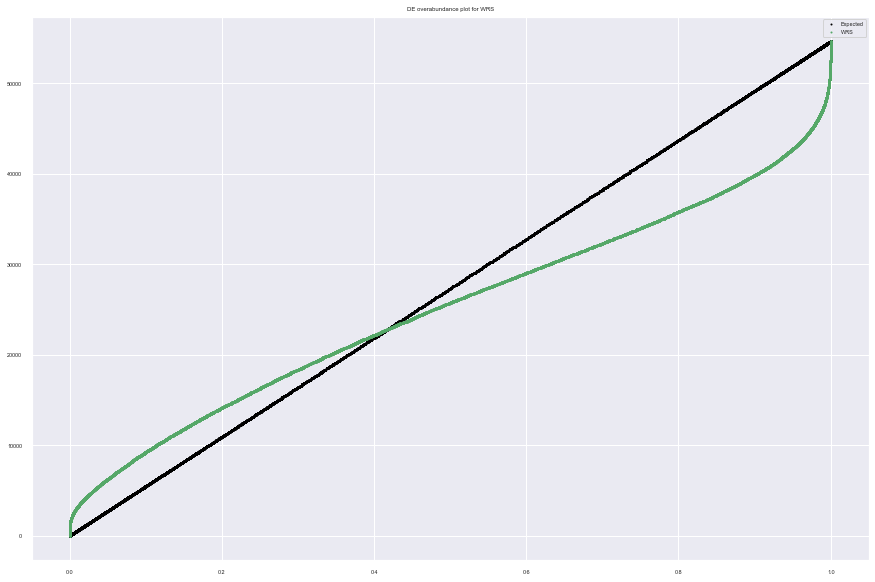

In [34]:
plt.figure(figsize = (15,10))
plt.scatter(pvals, eWPvals, label = "Expected", c = 'black', s=1)
plt.scatter(pvals, ranks_pvals, label = "WRS", c = 'g', s=1)
plt.legend()
plt.title("DE overabundance plot for WRS")
plt.show()

In [35]:
print(f"number of genes, we observed with an FDR threshold of: {0.05} is {geneForFdr(0.05, pvals)}")

number of genes, we observed with an FDR threshold of: 0.05 is 1842


c) What is the intersection of the genes you can report
above with the results of 3e1a. Explain. <br>
Comment: The process you ran in this section yields a set
of genes called Robust Differentially Expressed Genes (RDEG).

In [36]:
swaps_over = multipletests(pvals, alpha=0.05, method='fdr_bh')[1]<=0.05
w_overE = multipletests(w_right_pvals, alpha=0.05, method='fdr_bh')[1]<=0.05
inter = w_overE  & swaps_over
interGenes = np.where(inter)[0]
print(f" number of genes in intersection with the result of e1.a {len(interGenes)}")

 number of genes in intersection with the result of e1.a 1842


If a feature is strongly differentially expressed between two or more conditions,
a consistent, significant difference in the gene’s expression levels across these conditions could be implied,
In addition,
This difference is not common because the randomness of chance.
In this situation,
the common areas refers to genes with a significant values for a treshold,
Implying they are still important after one possible error.

3. Select any 3 differentially expressed genes, from D (which
was defined in 3d), and produce a graphical representation of
their expression patterns that demonstrates the observed DE.

In [37]:
sorted_genes_by_variance = d.var().sort_values(ascending=False)
selected = sorted_genes_by_variance.index[:3].values
print(f"Top 3 genes with the highest variance: {selected}")

Top 3 genes with the highest variance: ['209774_x_at' '218559_s_at' '204620_s_at']


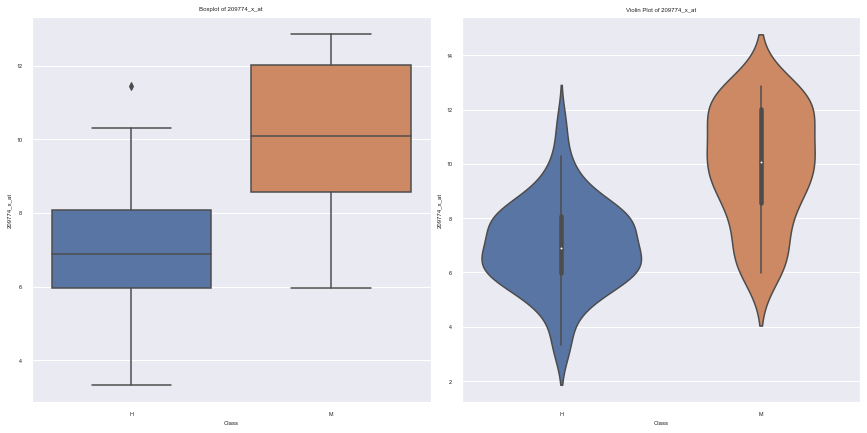

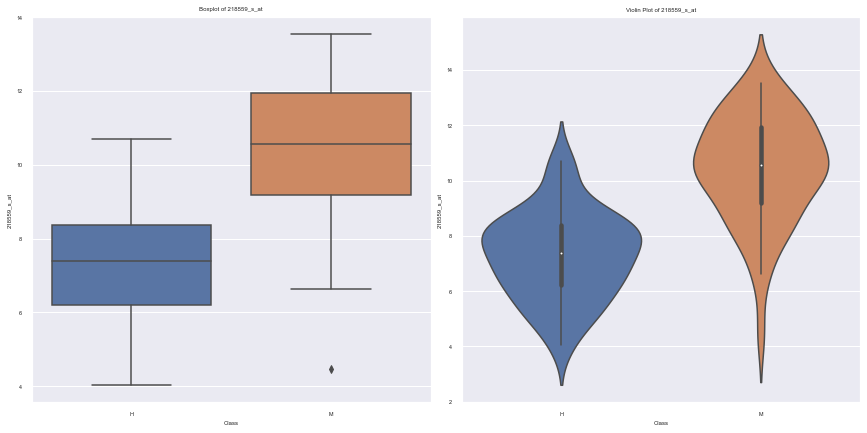

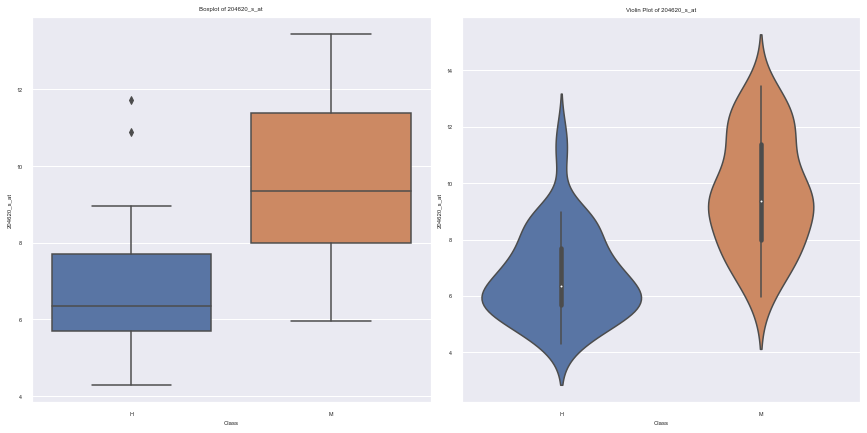

In [38]:
for gene in selected:
    plt.figure(figsize=(18, 6))

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Class', y=gene, data=df)
    plt.title(f'Boxplot of {gene}')

    # Violin Plot
    plt.subplot(1, 3, 2)
    sns.violinplot(x='Class', y=gene, data=df)
    plt.title(f'Violin Plot of {gene}')

    plt.tight_layout()
    plt.show()


4. Heatmap
Draw a heatmap representation of the expression values of
the genes in D (from 3d), across the entire cohort (all
samples). Order the genes and the samples to produce the
maximal visual effect.

In [39]:
d

,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,224196_x_at,223588_at,235310_at,222108_at,230428_at,235779_at,242874_at,1565882_at,227626_at,224879_at
1,8.070220,5.802974,6.896882,6.711893,6.038182,5.780497,6.781219,9.023625,6.667995,7.770745,...,10.401155,6.203788,6.590359,8.120315,8.718653,7.822442,9.455573,6.969992,8.858780,9.591532
2,7.779279,5.969281,11.701536,7.239616,6.171686,6.134241,6.837768,8.169069,6.362268,5.389721,...,10.691341,4.853874,7.161141,7.762667,8.621958,6.992076,9.317101,7.494097,9.237849,9.683986
3,8.901285,9.161624,10.016036,6.505777,4.150094,3.371993,6.396831,8.446429,6.709201,5.493529,...,10.648311,3.736956,6.133729,7.790073,7.956835,7.651365,8.738829,6.576974,8.441349,9.383290
4,7.808380,4.771720,6.018702,5.591840,5.385700,5.648239,6.400286,6.936367,5.686112,6.286257,...,10.877694,5.306395,6.893969,8.374069,9.110403,8.991112,9.554941,6.771564,8.920919,9.847400
5,8.170853,5.938545,6.692284,6.686149,5.703590,5.734383,6.709851,8.012119,6.543745,6.528912,...,10.697330,5.007132,7.129899,8.219504,7.974059,7.821126,9.589432,6.657010,8.906963,9.731894
6,9.250605,6.678167,7.520270,6.825741,5.047291,5.499735,6.635561,8.772721,7.039489,7.119783,...,10.595454,4.499818,6.102880,8.132025,9.108152,7.066618,9.768070,7.616017,8.653012,9.563459
7,8.749054,7.158564,7.916598,6.749416,4.852494,5.269540,6.293579,8.561704,5.387806,6.145284,...,10.592146,4.401712,7.661389,8.291119,8.147349,8.100338,8.711631,5.371187,8.823841,9.706008
8,8.254614,6.442963,7.634505,7.088498,4.265690,3.826242,6.865031,8.432461,5.912756,6.300898,...,10.626628,4.964288,6.787713,8.090156,8.008176,7.835128,8.866793,6.901108,9.155004,9.959172
9,7.118461,6.591772,7.564772,5.677008,5.081478,4.846725,6.355721,7.904189,6.486184,6.731975,...,10.283396,5.562328,7.946135,9.015753,8.265151,7.341183,9.161716,7.185100,8.693453,9.627326
10,8.591490,6.066629,7.449804,5.956614,5.492779,5.430395,6.374448,7.786342,6.506066,6.838555,...,10.546273,5.080319,7.353044,8.416274,8.278771,7.378664,9.353866,6.929824,9.080864,9.481493


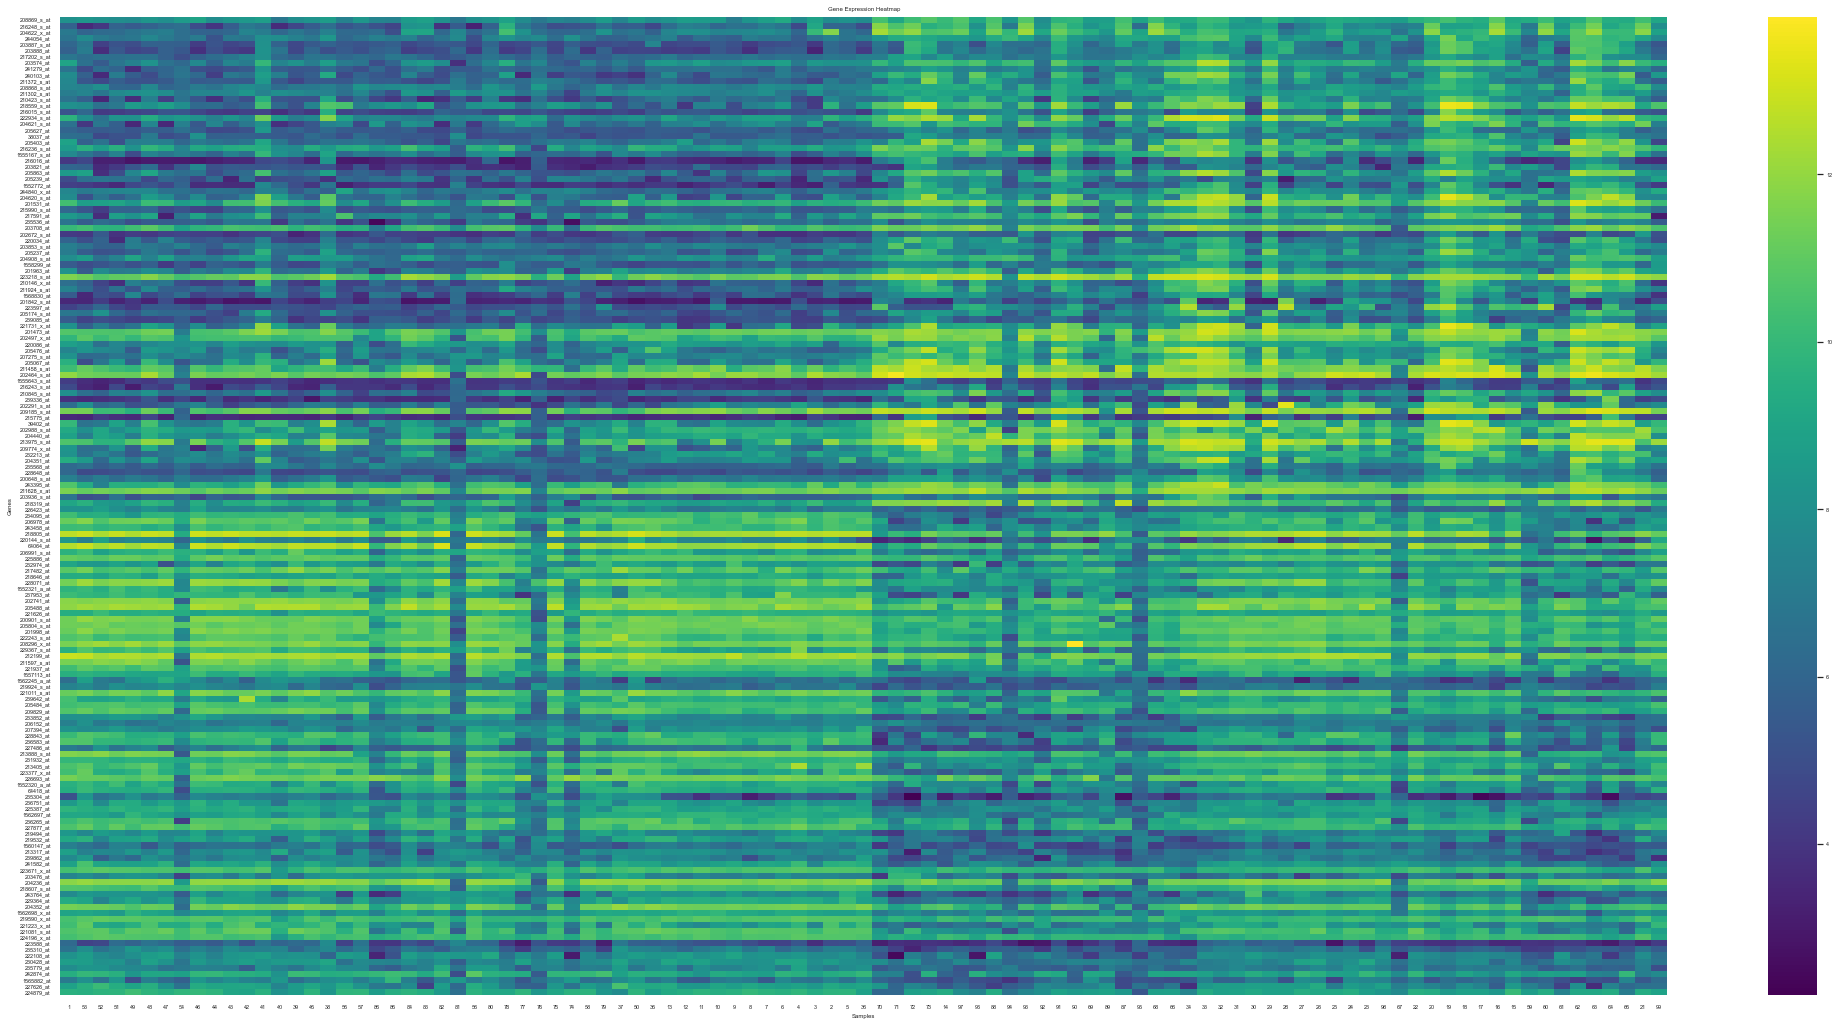

In [40]:
sort = df.sort_values(by='Class').index
d_class = pd.concat([df['Class'], d], axis=1)
sorted_d = d_class.sort_values(by='Class')
sorted_d = sorted_d.drop(columns='Class')

plt.figure(figsize=(36, 18))
sns.heatmap(sorted_d.transpose(), cmap='viridis')
plt.title('Gene Expression Heatmap')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()